In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
# Load data from pickle file
data_dict = pickle.load(open('./data.pickle', 'rb'))

In [3]:
# Assume data is a list of sequences, like text sequences
data_sequences = data_dict['data']

In [4]:
# Example: Padding sequences to a maximum length
max_sequence_length = 100  # Adjust as needed
data_padded = []
for sequence in data_sequences:
    if len(sequence) < max_sequence_length:
        padded_sequence = sequence + [0] * (max_sequence_length - len(sequence))  # Padding with zeros
    else:
        padded_sequence = sequence[:max_sequence_length]  # Trim to max length if longer
    data_padded.append(padded_sequence)

In [5]:
# Convert lists to numpy arrays
data = np.asarray(data_padded)
labels = np.asarray(data_dict['labels'])

In [6]:
# Convert labels to one-hot encoding
num_classes = len(np.unique(labels))
labels = to_categorical(labels, num_classes)

In [7]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

In [8]:
# Reshape data for CNN model
x_train_cnn = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_cnn = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [9]:
# Reshape data for VGG-like model
x_train_vgg = np.expand_dims(x_train, axis=-1)  # Adding channel dimension for Conv1D
x_test_vgg = np.expand_dims(x_test, axis=-1)


In [10]:
# Build CNN model
def build_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# Build VGG16-like model for 1D data
def build_vgg16_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Conv1D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv1D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv1D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Conv1D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv1D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv1D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
# Build 1D ResNet-like model
def build_resnet_model(input_shape, num_classes):
    model = Sequential()

    # First Conv Block
    model.add(Conv1D(64, kernel_size=7, strides=2, padding='same', input_shape=input_shape, activation='relu'))
    model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

    # Residual Block 1
    model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=3, padding='same'))

    # Residual Block 2
    model.add(Conv1D(128, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=3, padding='same'))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [23]:
from tensorflow.keras.regularizers import l2

# Build ResNet-like model with L2 regularization
def build_resnet_model_with_regularization(input_shape, num_classes):
    model = Sequential()

    # First Conv Block
    model.add(Conv1D(64, kernel_size=7, strides=2, padding='same', input_shape=input_shape, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

    # Residual Block 1
    model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Conv1D(64, kernel_size=3, padding='same', kernel_regularizer=l2(0.01)))

    # Residual Block 2
    model.add(Conv1D(128, kernel_size=3, padding='same', activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Conv1D(128, kernel_size=3, padding='same', kernel_regularizer=l2(0.01)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# Build CNN model
cnn_model = build_cnn_model((max_sequence_length, 1), num_classes)
cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.2)


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.0559 - loss: 3.2256 - val_accuracy: 0.1900 - val_loss: 2.9697
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1893 - loss: 2.7879 - val_accuracy: 0.6200 - val_loss: 1.8825
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3964 - loss: 1.9157 - val_accuracy: 0.8150 - val_loss: 0.9882
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5994 - loss: 1.2645 - val_accuracy: 0.8850 - val_loss: 0.5848
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7023 - loss: 0.9073 - val_accuracy: 0.9600 - val_loss: 0.3564
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7648 - loss: 0.6826 - val_accuracy: 0.9675 - val_loss: 0.2447
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8294 - loss: 0.5261 - val_accuracy: 0.9825 - val_loss: 0.1629
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8649 - loss: 0.4040 - val_accuracy: 1.0000 - v

In [14]:
# Build VGG16-like model
vgg16_model = build_vgg16_model((max_sequence_length, 1), num_classes)
vgg16_history = vgg16_model.fit(x_train_vgg, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 236ms/step - accuracy: 0.0565 - loss: 3.1793 - val_accuracy: 0.1650 - val_loss: 2.5405
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.1634 - loss: 2.4544 - val_accuracy: 0.3375 - val_loss: 1.9900
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.3703 - loss: 1.8276 - val_accuracy: 0.7050 - val_loss: 0.8132
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.6664 - loss: 0.9139 - val_accuracy: 0.8950 - val_loss: 0.3089
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 229ms/step - accuracy: 0.8379 - loss: 0.4139 - val_accuracy: 0.9325 - val_loss: 0.1540
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - accuracy: 0.8901 - loss: 0.2766 - val_accuracy: 0.9950 - val_loss: 0.0290
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.9689 - loss: 0.1192 - val_accuracy: 0.9625 - val_loss: 0.2459
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.9279 - loss: 0.2101 - val_accu

In [24]:
# Build and train the model
resnet_reg_model = build_resnet_model_with_regularization((max_sequence_length, 1), num_classes)
resnet_reg_history = resnet_reg_model.fit(x_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.0595 - loss: 8.0751 - val_accuracy: 0.1025 - val_loss: 3.5624
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.1492 - loss: 3.2708 - val_accuracy: 0.4750 - val_loss: 2.1307
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4372 - loss: 2.1923 - val_accuracy: 0.7575 - val_loss: 1.4539
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5726 - loss: 1.6817 - val_accuracy: 0.7675 - val_loss: 1.1388
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7078 - loss: 1.3227 - val_accuracy: 0.9050 - val_loss: 0.9483
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7323 - loss: 1.2099 - val_accuracy: 0.8800 - val_loss: 0.8921
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7959 - loss: 1.0793 - val_accuracy: 0.9200 - val_loss: 0.8023
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8101 - loss: 1.0134 - val_accuracy: 0.8975 - 

In [20]:
# Evaluate CNN model
cnn_accuracy = cnn_model.evaluate(x_test_cnn, y_test)[1]
print(f"CNN Model Accuracy: {cnn_accuracy * 100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0138
CNN Model Accuracy: 100.00%


In [21]:
# Evaluate VGG16-like model
vgg16_accuracy = vgg16_model.evaluate(x_test_vgg, y_test)[1]
print(f"VGG16 Accuracy: {vgg16_accuracy * 100:.2f}%")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9679 - loss: 0.0706
VGG16 Accuracy: 97.00%


In [25]:
# Evaluate the model
resnet_reg_accuracy = resnet_reg_model.evaluate(x_test_cnn, y_test)[1]
print(f"ResNet Model with Regularization Accuracy: {resnet_reg_accuracy * 100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9233 - loss: 0.6031
ResNet Model with Regularization Accuracy: 93.00%


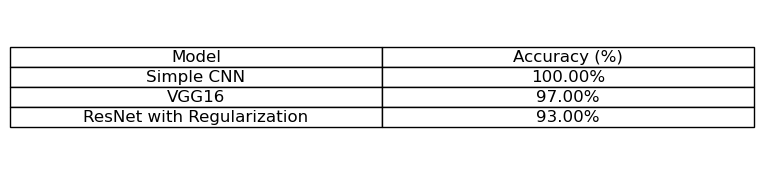

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Data with formatted accuracies
comparison_df = pd.DataFrame({
    "Model": ["Simple CNN", "VGG16", "ResNet with Regularization"],
    "Accuracy (%)": [f"{cnn_accuracy * 100:.2f}%", f"{vgg16_accuracy * 100:.2f}%", f"{resnet_reg_accuracy * 100:.2f}%"]
})

# Plot table
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')
table = ax.table(cellText=comparison_df.values, colLabels=comparison_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.show()


In [30]:
def plot_model_history(history, model_name):
    # Plotting model accuracy
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train_accuracy', 'val_accuracy'], loc='lower right')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train_loss', 'val_loss'], loc='upper right')

    plt.show()

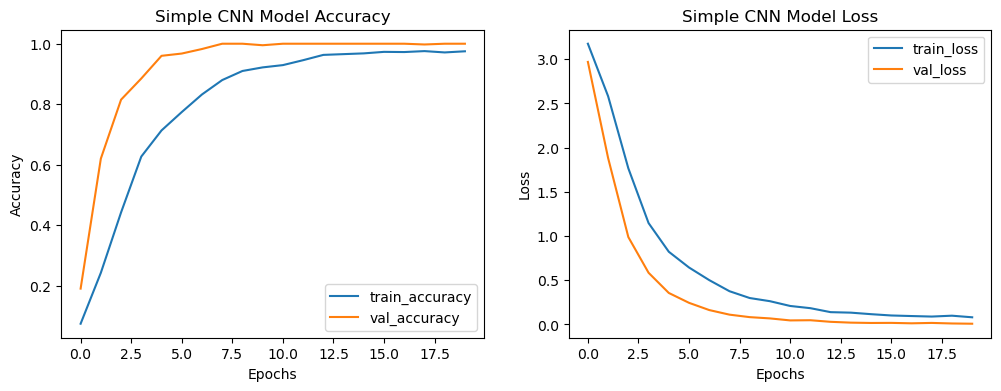

In [31]:
plot_model_history(cnn_history, 'Simple CNN')


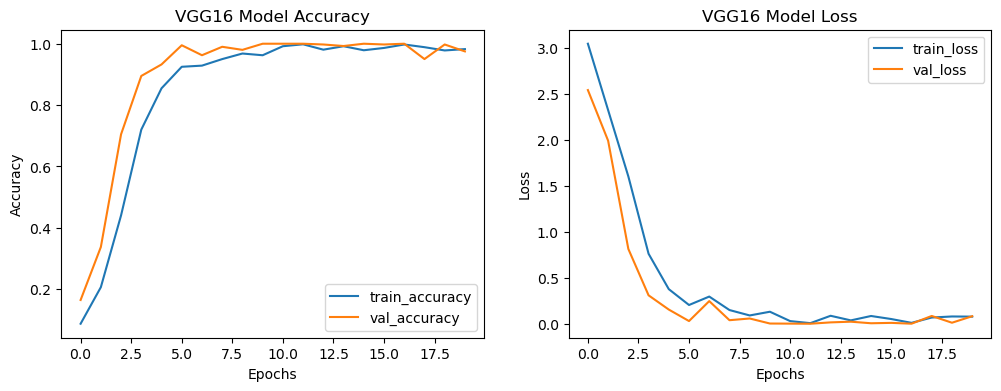

In [32]:
plot_model_history(vgg16_history, 'VGG16')


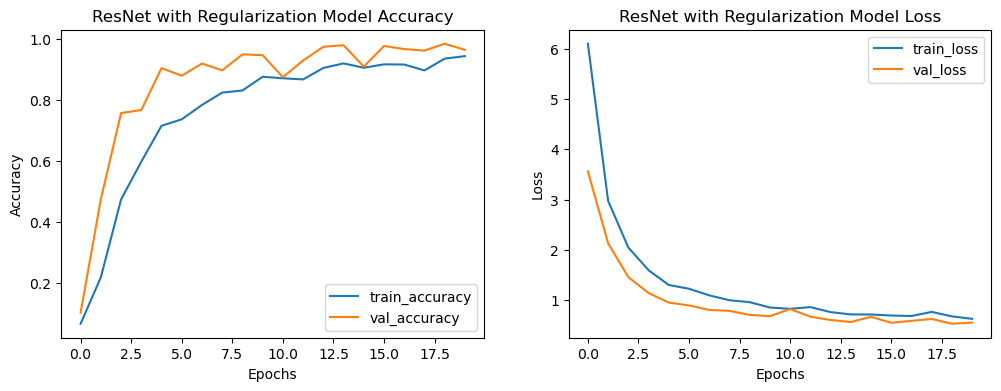

In [33]:
# Plotting the history for ResNet with Regularization
plot_model_history(resnet_reg_history, "ResNet with Regularization")

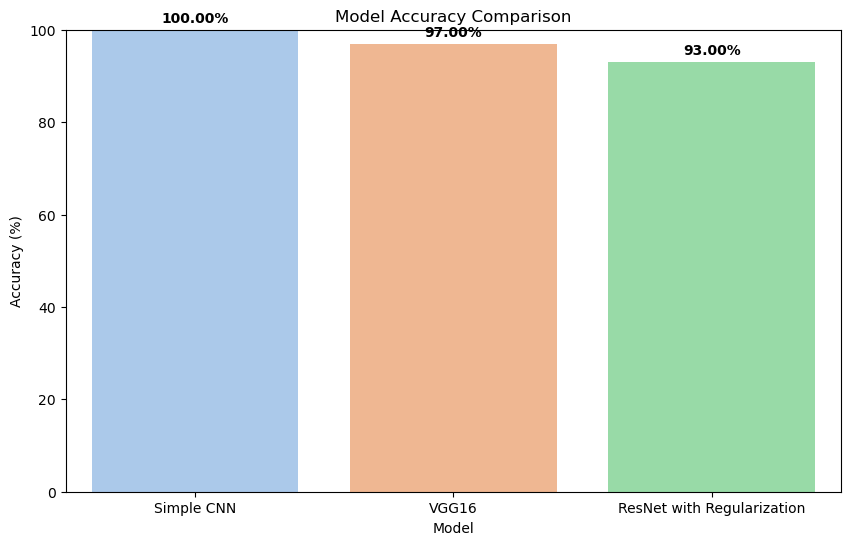

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Updated Comparison Table
comparison_results = {
    "Model": ["Simple CNN", "VGG16", "ResNet with Regularization"],
    "Accuracy": [cnn_accuracy, vgg16_accuracy, resnet_reg_accuracy]
}

# Plotting the comparison results
model_names = comparison_results["Model"]
accuracies = [acc * 100 for acc in comparison_results["Accuracy"]]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="pastel")
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.ylim(0, 100)

# Annotating each bar with the accuracy value
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', va='bottom', fontweight='bold')

plt.show()


In [24]:


# Save the models
cnn_model.save('cnn_model.h5')
vgg16_model.save('vgg16_model.h5')
